In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import mlxtend as ml
import math, statistics, sklearn, itertools

from pca import pca
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score

from sklearn.linear_model import BayesianRidge

from sklearn.preprocessing import PolynomialFeatures

pd.options.display.max_colwidth = 200
warnings.filterwarnings('ignore') 
warnings.simplefilter('ignore', np.RankWarning)

In [2]:
# This is the dataset that concludes monthly recorded Bitcoin price
bit_url = "https://raw.githubusercontent.com/sfiohgihase/cds492/main/Bitcoin_Historical_Data.csv"
df1 = pd.read_csv(bit_url)
df1

,Date,Price,Open,High,Low,Vol.,Change %
0,10-Aug,0.1,0.1,0.1,0,221.74K,0.00%
1,10-Sep,0.1,0.1,0.2,0.1,216.81K,0.00%
2,10-Oct,0.2,0.1,0.2,0,1.11M,210.99%
3,10-Nov,0.2,0.2,0.5,0.1,826.25K,0.00%
4,10-Dec,0.3,0.2,0.3,0.2,263.65K,44.09%
...,...,...,...,...,...,...,...
144,22-Aug,20043.9,"23,303.40","25,205.70","19,542.90",6.55M,-13.99%
145,22-Sep,19423.0,"20,049.90","22,702.50","18,191.80",10.91M,-3.10%
146,22-Oct,20496.3,"19,422.90","21,038.10","18,207.90",8.29M,5.53%
147,22-Nov,17163.9,"20,496.10","21,464.70","15,504.20",10.30M,-16.26%


In [3]:
# left data and price only which are useful in further progress
df1 = df1[["Date","Price"]]
df1

,Date,Price
0,10-Aug,0.1
1,10-Sep,0.1
2,10-Oct,0.2
3,10-Nov,0.2
4,10-Dec,0.3
...,...,...
144,22-Aug,20043.9
145,22-Sep,19423.0
146,22-Oct,20496.3
147,22-Nov,17163.9


In [4]:
# It is a dataset that concludes monthly recoreded CPI
cpi_url = "https://raw.githubusercontent.com/sfiohgihase/cds492/main/bls_cpi.csv"
df2 = pd.read_csv(cpi_url)
df2

,Label,Observation Value
0,2010 Aug,217.923
1,2010 Sep,218.275
2,2010 Oct,219.035
3,2010 Nov,219.590
4,2010 Dec,220.472
...,...,...
144,2022 Aug,295.320
145,2022 Sep,296.539
146,2022 Oct,297.987
147,2022 Nov,298.598


In [5]:
# drop the date and rename the value as CPI for the further merging
df2 = df2[["Observation Value"]]
df2 = df2.rename(columns = {'Observation Value': 'CPI'})
df2

,CPI
0,217.923
1,218.275
2,219.035
3,219.590
4,220.472
...,...
144,295.320
145,296.539
146,297.987
147,298.598


In [6]:
# this is the dataset that includes monthly PPI values
ppi_url = "https://raw.githubusercontent.com/sfiohgihase/cds492/main/bls_ppi.csv"
df3 = pd.read_csv(ppi_url)
df3

,Label,Observation Value
0,2010 Aug,101.800
1,2010 Sep,102.100
2,2010 Oct,102.500
3,2010 Nov,102.800
4,2010 Dec,103.100
...,...,...
144,2022 Aug,139.789
145,2022 Sep,140.191
146,2022 Oct,140.640
147,2022 Nov,141.175


In [7]:
# drop the date and rename the value as PPI for the further merging
df3 = df3[["Observation Value"]]
df3 = df3.rename(columns = {'Observation Value': 'PPI'})
df3

,PPI
0,101.800
1,102.100
2,102.500
3,102.800
4,103.100
...,...
144,139.789
145,140.191
146,140.640
147,141.175


In [8]:
# this data includes DXY value from August 2010 to December 2022
dxy_url = "https://raw.githubusercontent.com/sfiohgihase/cds492/main/yahoo_DXY.csv"
df4 = pd.read_csv(dxy_url)
df4

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-01,81.519997,83.559998,80.089996,83.199997,83.199997,0
1,2010-09-01,83.089996,83.220001,78.410004,78.720001,78.720001,0
2,2010-10-01,78.800003,78.830002,76.139999,77.269997,77.269997,0
3,2010-11-01,76.949997,81.440002,75.629997,81.199997,81.199997,0
4,2010-12-01,81.260002,81.360001,78.779999,79.029999,79.029999,0
...,...,...,...,...,...,...,...
144,2022-08-01,105.830002,109.480003,104.639999,108.699997,108.699997,0
145,2022-09-01,108.839996,114.779999,107.680000,112.120003,112.120003,0
146,2022-10-01,112.169998,113.940002,109.540001,111.529999,111.529999,0
147,2022-11-01,111.519997,113.150002,105.320000,105.949997,105.949997,0


In [9]:
# extract "Adjusted Close" only, which we are interested in
df4 = df4[["Adj Close"]]
df4 = df4.rename(columns = {'Adj Close': 'DXY'})
df4

,DXY
0,83.199997
1,78.720001
2,77.269997
3,81.199997
4,79.029999
...,...
144,108.699997
145,112.120003
146,111.529999
147,105.949997


In [10]:
# this dataset includes VIX values with the same period as above
vix_url = "https://raw.githubusercontent.com/sfiohgihase/cds492/main/yahoo_VIX.csv"
df5 = pd.read_csv(vix_url)
df5

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-01,23.070000,28.920000,21.360001,26.049999,26.049999,0
1,2010-09-01,25.129999,25.129999,20.850000,23.700001,23.700001,0
2,2010-10-01,22.900000,24.340000,17.900000,21.200001,21.200001,0
3,2010-11-01,21.650000,23.840000,17.760000,23.540001,23.540001,0
4,2010-12-01,21.190001,21.430000,15.400000,17.750000,17.750000,0
...,...,...,...,...,...,...,...
144,2022-08-01,22.410000,27.690001,19.120001,25.870001,25.870001,0
145,2022-09-01,26.879999,34.880001,22.639999,31.620001,31.620001,0
146,2022-10-01,33.000000,34.529999,25.750000,25.879999,25.879999,0
147,2022-11-01,25.959999,26.870001,20.309999,20.580000,20.580000,0


In [11]:
# Likewise, extract "Adjusted Close" only
df5 = df5[["Adj Close"]]
df5 = df5.rename(columns = {'Adj Close': 'VIX'})
df5

,VIX
0,26.049999
1,23.700001
2,21.200001
3,23.540001
4,17.750000
...,...
144,25.870001
145,31.620001
146,25.879999
147,20.580000


In [12]:
# this table shows Nasdaq Composite values for the given period
nasdaq_url = "https://raw.githubusercontent.com/sfiohgihase/cds492/main/yahoo_nasdaq.csv"
df6 = pd.read_csv(nasdaq_url)
df6

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-08-01,2283.320068,2309.429932,2099.290039,2114.030029,2114.030029,4.179424e+10
1,2010-09-01,2142.750000,2400.060059,2141.949951,2368.620117,2368.620117,4.158687e+10
2,2010-10-01,2386.820068,2517.500000,2332.459961,2507.409912,2507.409912,4.153976e+10
3,2010-11-01,2520.449951,2592.939941,2459.790039,2498.229980,2498.229980,4.089356e+10
4,2010-12-01,2535.189941,2675.260010,2535.189941,2652.870117,2652.870117,3.630689e+10
...,...,...,...,...,...,...,...
144,2022-08-01,12317.959960,13181.089840,11790.019530,11816.200200,11816.200200,1.100000e+11
145,2022-09-01,11707.440430,12270.190430,10572.330080,10575.620120,10575.620120,9.888853e+10
146,2022-10-01,10659.009770,11230.440430,10088.830080,10988.150390,10988.150390,9.829238e+10
147,2022-11-01,11154.740230,11492.620120,10262.929690,11468.000000,11468.000000,1.020000e+11


In [13]:
# extract "Adjusted Close" values only
df6 = df6[["Adj Close"]]
df6 = df6.rename(columns = {'Adj Close': 'NASDAQ'})
df6

,NASDAQ
0,2114.030029
1,2368.620117
2,2507.409912
3,2498.229980
4,2652.870117
...,...
144,11816.200200
145,10575.620120
146,10988.150390
147,11468.000000


In [14]:
# merge all at one table for the further EDA and machine learning
df_final = df1.join(df2, how = 'outer')
df_final = df_final.join(df3, how = 'outer')
df_final = df_final.join(df4, how = 'outer')
df_final = df_final.join(df5, how = 'outer')
df_final = df_final.join(df6, how = 'outer')
df_final

,Date,Price,CPI,PPI,DXY,VIX,NASDAQ
0,10-Aug,0.1,217.923,101.800,83.199997,26.049999,2114.030029
1,10-Sep,0.1,218.275,102.100,78.720001,23.700001,2368.620117
2,10-Oct,0.2,219.035,102.500,77.269997,21.200001,2507.409912
3,10-Nov,0.2,219.590,102.800,81.199997,23.540001,2498.229980
4,10-Dec,0.3,220.472,103.100,79.029999,17.750000,2652.870117
...,...,...,...,...,...,...,...
144,22-Aug,20043.9,295.320,139.789,108.699997,25.870001,11816.200200
145,22-Sep,19423.0,296.539,140.191,112.120003,31.620001,10575.620120
146,22-Oct,20496.3,297.987,140.640,111.529999,25.879999,10988.150390
147,22-Nov,17163.9,298.598,141.175,105.949997,20.580000,11468.000000


In [15]:
# check the summary statistics for each column
df_final.describe()

,Price,CPI,PPI,DXY,VIX,NASDAQ
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,8663.234228,246.987725,114.982168,90.809664,18.796510,6697.069405
std,14461.031253,19.187674,9.244508,8.860210,7.007841,3689.204402
min,0.100000,217.923000,101.800000,72.930000,9.510000,2114.030029
25%,141.900000,233.544000,109.300000,81.459999,13.780000,3771.479980
50%,938.800000,241.741000,111.300000,93.489998,16.860001,5312.000000
75%,9454.800000,256.511000,118.300000,97.269997,21.230000,8292.360352
max,61309.600000,298.990000,141.175000,112.120003,53.540001,15644.969730


In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    149 non-null    object 
 1   Price   149 non-null    float64
 2   CPI     149 non-null    float64
 3   PPI     149 non-null    float64
 4   DXY     149 non-null    float64
 5   VIX     149 non-null    float64
 6   NASDAQ  149 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [17]:
df_final.shape

(149, 7)

In [18]:
df_final.isnull()

,Date,Price,CPI,PPI,DXY,VIX,NASDAQ
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
144,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False


In [19]:
# using StandardScaler to remove the mean and scaling to the variance
# for the further progress

df_final = df_final.drop(columns=['Date'])
scaler = StandardScaler()
df_num = scaler.fit_transform(df_final)
feature_names = scaler.get_feature_names_out()
df_fnum = pd.DataFrame(df_num, columns = feature_names)
df_fnum

,Price,CPI,PPI,DXY,VIX,NASDAQ
0,-0.601088,-1.519869,-1.430755,-0.861755,1.038544,-1.246474
1,-0.601088,-1.501462,-1.398194,-1.369091,0.702075,-1.177232
2,-0.601081,-1.461720,-1.354779,-1.533297,0.344128,-1.139484
3,-0.601081,-1.432697,-1.322218,-1.088245,0.679166,-1.141981
4,-0.601074,-1.386575,-1.289657,-1.333986,-0.149838,-1.099923
...,...,...,...,...,...,...
144,0.789643,2.527419,2.692463,2.025987,1.012772,1.392277
145,0.746562,2.591163,2.736095,2.413285,1.836049,1.054870
146,0.821032,2.666883,2.784828,2.346470,1.014204,1.167068
147,0.589815,2.698834,2.842896,1.714564,0.255358,1.297576


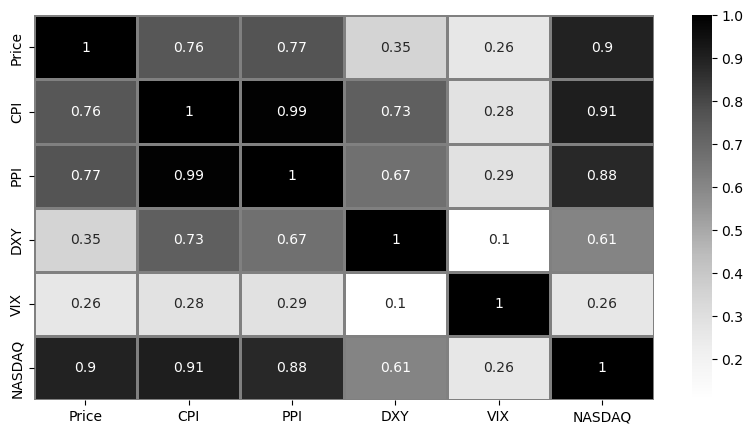

In [20]:
# EDA
matrix = df_fnum.corr()
fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(matrix, linewidths = 1, linecolor = 'gray', annot = True, cmap = 'Greys', ax = ax)
plt.show()

It seems like the relationships between Price and CPI, PPI, NASDAQ Composite have higher correlation values compared to the other economic indices.

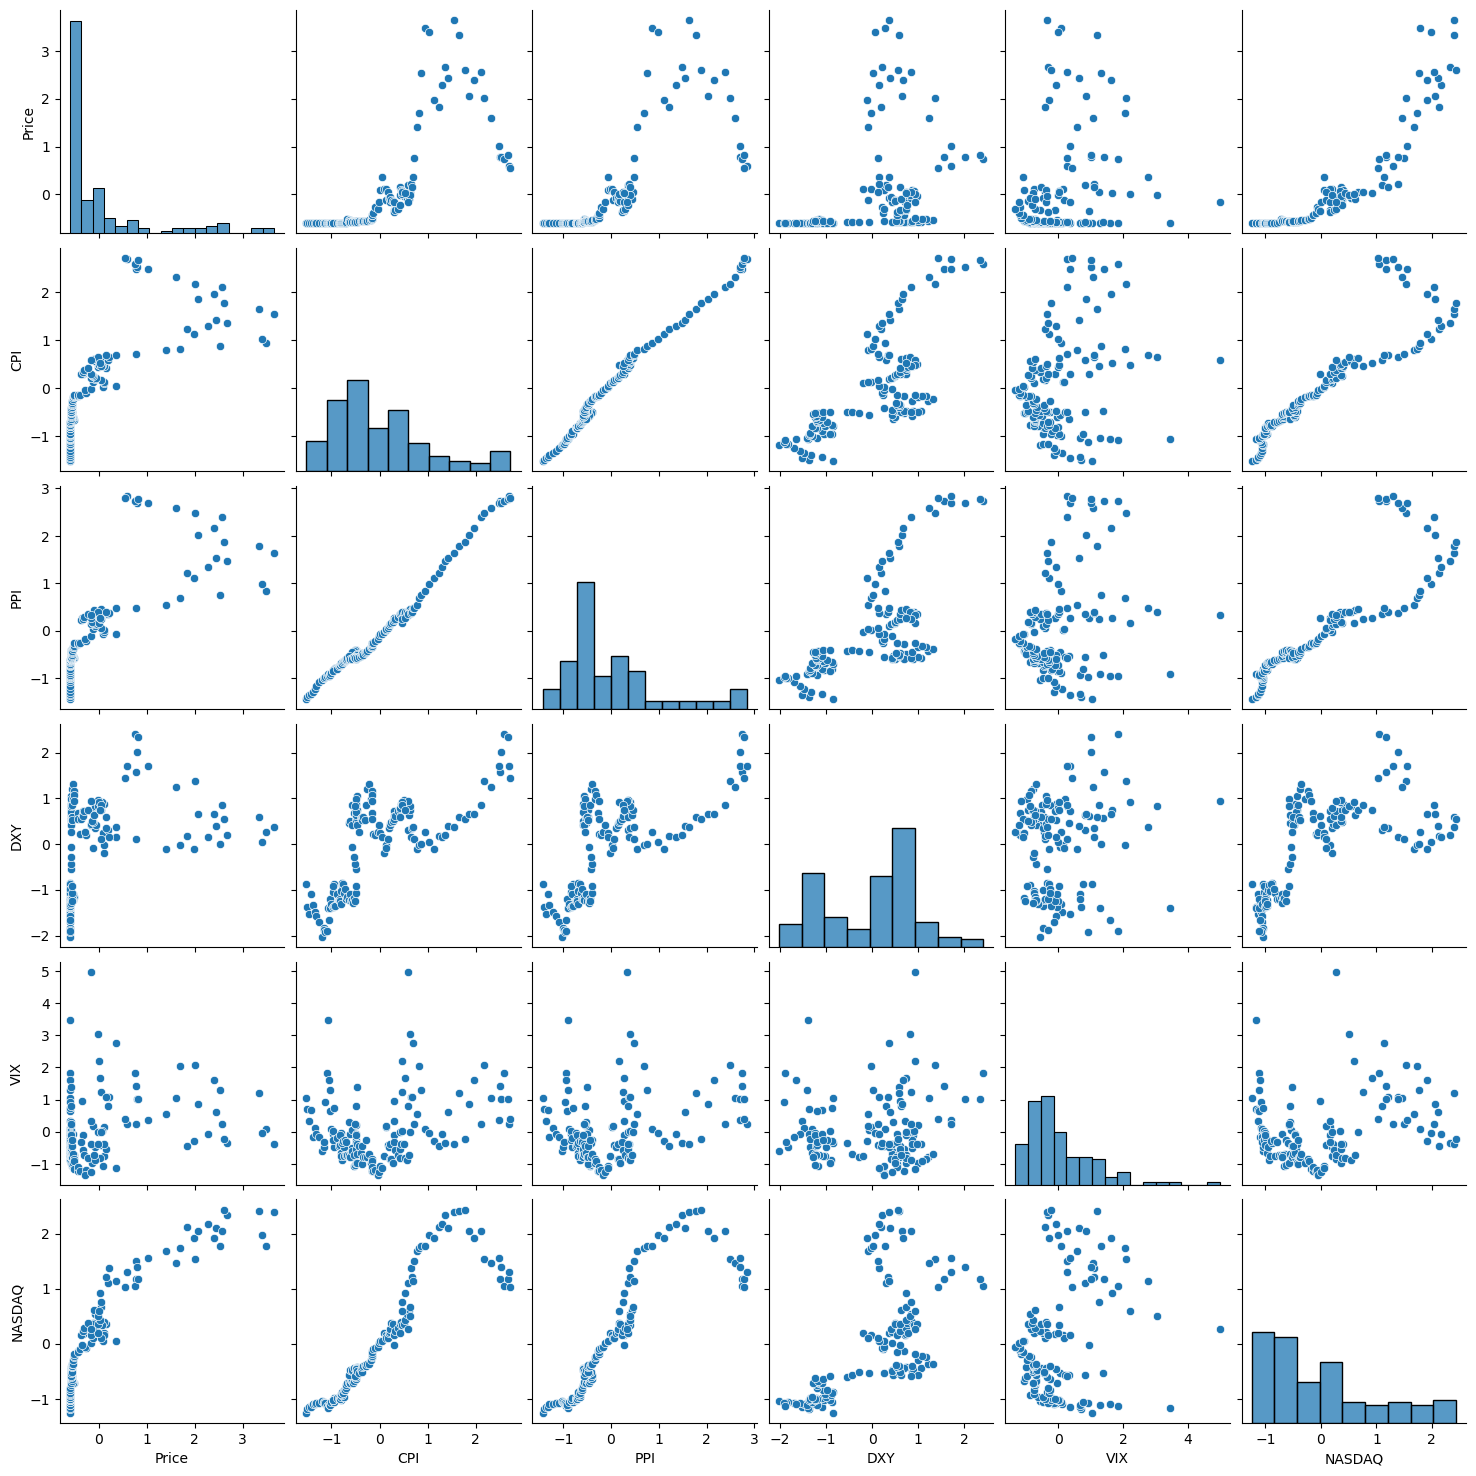

In [21]:
sns.pairplot(df_fnum)

The relationship between Price and NASDAQQ seems quite straightforward compared to the other relations. They show linear relation whereas others do not show meaningful relations. What is quite interesting is that CPI and PPI has a clear linear retionship.

In [22]:
# PCA

# Initialize with normalization, which puts all features on the same scale
model = pca(normalize = True, n_components = None)

# Print out the results
print('Fit Transform Results')
results = model.fit_transform(df_fnum)

Fit Transform Results
[pca] >n_components is set to 5
[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


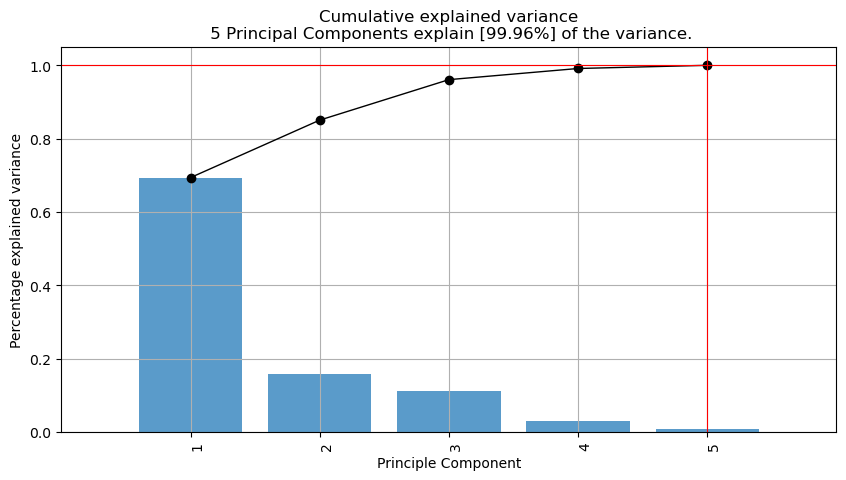

(<Figure size 1000x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 5 Principal Components explain [99.96%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 640x480 with 0 Axes>

In [23]:
model.plot(figsize = (10,5))

In [24]:
# figure out the relative effect each had on the component
results = pd.DataFrame(model.results['loadings'])
results

,Price,CPI,PPI,DXY,VIX,NASDAQ
PC1,0.415340,0.479376,0.472525,0.353413,0.170895,0.469368
PC2,0.099600,-0.079791,-0.049202,-0.351127,0.925804,-0.029809
PC3,0.586991,-0.082918,-0.019233,-0.698076,-0.328673,0.229913
PC4,-0.396823,0.416733,0.598414,-0.463379,-0.075016,-0.300696
PC5,-0.552782,0.095529,-0.213771,-0.216267,-0.000890,0.769959


In [25]:
model.results['topfeat']

,PC,feature,loading,type
0,PC1,CPI,0.479376,best
1,PC2,VIX,0.925804,best
2,PC3,DXY,-0.698076,best
3,PC4,PPI,0.598414,best
4,PC5,NASDAQ,0.769959,best
5,PC3,Price,0.586991,weak


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'5 Principal Components explain [99.96%] of the variance'}, xlabel='PC1 (69.3% expl.var)', ylabel='PC2 (15.6% expl.var)'>)

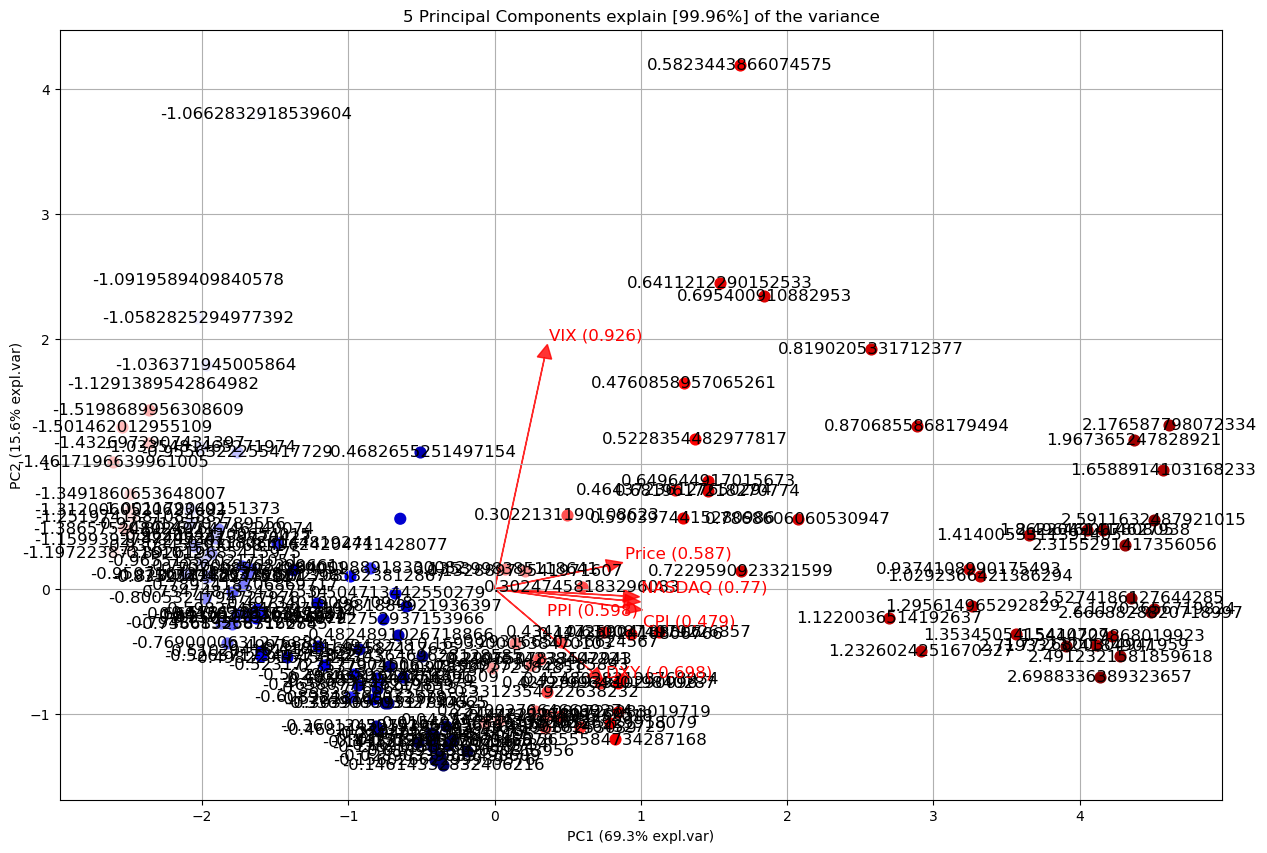

In [26]:
# Visualize the results to compare components
model.biplot(y=df_fnum['CPI'].values, legend = False, cmap = 'seismic')

In [27]:
# Regression method

# Creating training and test datasets
Xdata = df_fnum.drop(['Price'], axis=1)
ydata = df_fnum['Price']

X = Xdata.to_numpy()
y = ydata.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train_pct = round((len(X_train) / (len(X_train) + len(X_test))), 2)
X_test_pct = round((len(X_test) / (len(X_train) + len(X_test))), 2)

print('Classification training dataset shape is:', X_train.shape, 'Testing dataset shape is:', X_test.shape)
print('Regression train/test split is:', X_train_pct, '/', X_test_pct)

Classification training dataset shape is: (119, 5) Testing dataset shape is: (30, 5)
Regression train/test split is: 0.8 / 0.2


In [28]:
# Create dictionaries for parameters and models to estimate which model is appropriate to the project
param_dict = {
    'rg' : ('alpha', [1, 2, 3, 4], 'solver', ['auto', 'svd']),
    'la' : ('alpha', [1, 2, 3, 4], 'positive', [True, False]),
    'sgd' : ('penalty', ['l2', 'l1', 'elasticnet'], 'alpha', [1, 2, 3, 4, 5]),
    'poly': ('degree', [1,2,3,4], 'include_bias', [True, False]),
    'lin': ('fit_intercept', [True, False], 'normalize', [True, False]),
    'br' : ('n_iter', [100, 200, 300, 400], 'fit_intercept', [True, False])
    }

# use Ridge, Lasso, SGD Regressor, Linear regression including polynomial, and Bayesian Ridge methods
model_dict = { 
    'rg' : Ridge(),
    'la' : Lasso(),
    'sgd' : SGDRegressor(),
    'poly' : LinearRegression(),
    'lin' : LinearRegression(),
    'br' : BayesianRidge()
}
poly_feature_extractor = PolynomialFeatures()

In [29]:
summary = []

for i in ['rg', 'la', 'sgd', 'poly', 'lin', 'br']:
    param_grid = list(itertools.product(param_dict[i][1], param_dict[i][3]))
    for k in range(len(param_grid)):
        if i == 'poly':
            poly_feature_extractor.set_params(**{param_dict[i][0]:param_grid[k][0], param_dict[i][2]:param_grid[k][1]})
            X_train_poly = poly_feature_extractor.fit_transform(X_train)
            X_test_poly = poly_feature_extractor.transform(X_test)
            model = model_dict[i]
            reg = model.fit(X_train_poly, y_train)
            y_pred = reg.predict(X_test_poly)
            y_trnd = reg.predict(X_train_poly)
        elif i == 'lin':
            param_grid_dict = {param_dict[i][0] : param_grid[k][0], param_dict[i][2] : (param_grid[k][1])}
            model = model_dict[i]
            model.set_params(**param_grid_dict)
            reg = model.fit(X_train, y_train)
            y_pred = reg.predict(X_test)
            y_trnd = reg.predict(X_train)
        else:
            param_grid_dict = {param_dict[i][0] : param_grid[k][0], param_dict[i][2] : (param_grid[k][1])}
            model = model_dict[i]
            model.set_params(**param_grid_dict)
            reg = model.fit(X_train, y_train)
            y_pred = reg.predict(X_test)
            y_trnd = reg.predict(X_train)
        r2_test = round(r2_score(y_test, y_pred), 2)
        mse_test = round(mean_squared_error(y_test, y_pred), 2)
        r2_train = round(r2_score(y_train, y_trnd), 2)
        mse_train = round(mean_squared_error(y_train, y_trnd), 2)
        loss, bias, var = bias_variance_decomp(
            model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
        summary.append([i, param_dict[i][0], param_grid[k][0], param_dict[i][2], param_grid[k][1], 
                        r2_test, mse_test, r2_train, mse_train, loss, bias, var])
summary_df = pd.DataFrame(summary, columns=('model', 'param1', 'parval1', 'param2', 'parval2', 
                        'r2test', 'msetest', 'r2train', 'msetrain', 'loss', 'bias', 'var'))
summary_df['r2diff'] = summary_df['r2train'] - summary_df['r2test']
summary_df['msediff'] = summary_df['msetrain'] - summary_df['msetest']


In [30]:
summary_df

,model,param1,parval1,param2,parval2,r2test,msetest,r2train,msetrain,loss,bias,var,r2diff,msediff
0,rg,alpha,1,solver,auto,0.84,0.12,0.90,0.10,0.121845,0.118570,0.003275,0.06,-0.02
1,rg,alpha,1,solver,svd,0.84,0.12,0.90,0.10,0.121845,0.118570,0.003275,0.06,-0.02
2,rg,alpha,2,solver,auto,0.83,0.12,0.89,0.12,0.128063,0.124577,0.003486,0.06,0.00
3,rg,alpha,2,solver,svd,0.83,0.12,0.89,0.12,0.128063,0.124577,0.003486,0.06,0.00
4,rg,alpha,3,solver,auto,0.83,0.13,0.88,0.12,0.132986,0.129446,0.003540,0.05,-0.01
5,rg,alpha,3,solver,svd,0.83,0.13,0.88,0.12,0.132986,0.129446,0.003540,0.05,-0.01
6,rg,alpha,4,solver,auto,0.82,0.13,0.88,0.13,0.137310,0.133764,0.003546,0.06,0.00
7,rg,alpha,4,solver,svd,0.82,0.13,0.88,0.13,0.137310,0.133764,0.003546,0.06,0.00
8,la,alpha,1,positive,True,-0.04,0.78,0.00,1.06,0.741141,0.733334,0.007806,0.04,0.28
9,la,alpha,1,positive,False,-0.04,0.78,0.00,1.06,0.741141,0.733334,0.007806,0.04,0.28


Polynomial Regression - Training Set
MSE:  0.04120546122167187
R2 Score:  0.9610510203329348


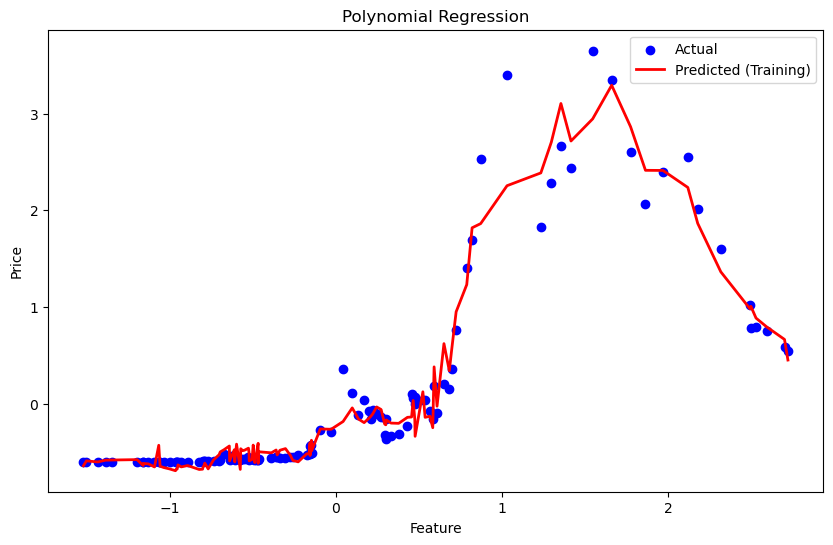

In [31]:
# Polynomial Regression
poly_degree = 2  # Set the degree of the polynomial

poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on training and test data
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

# Evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Polynomial Regression - Training Set")
print("MSE: ", mse_train)
print("R2 Score: ", r2_train)

# Visualization
plt.figure(figsize=(10, 6))

# Sort the values for better visualization
sort_axis = np.argsort(X_train[:, 0])
sorted_x = X_train[:, 0][sort_axis]
sorted_y = y_train[sort_axis]
plt.scatter(sorted_x, sorted_y, color='blue', label='Actual')

# Predicted values for training data
y_train_pred = poly_model.predict(poly_features.transform(X_train))
plt.plot(sorted_x, y_train_pred[sort_axis], color='red', linewidth=2, label='Predicted (Training)')

plt.xlabel('Feature')
plt.ylabel('Price')
plt.title('Polynomial Regression')
plt.legend()
plt.show()



Polynomial Regression - Test Set
MSE:  0.12388557360600916
R2 Score:  0.8336865964285465


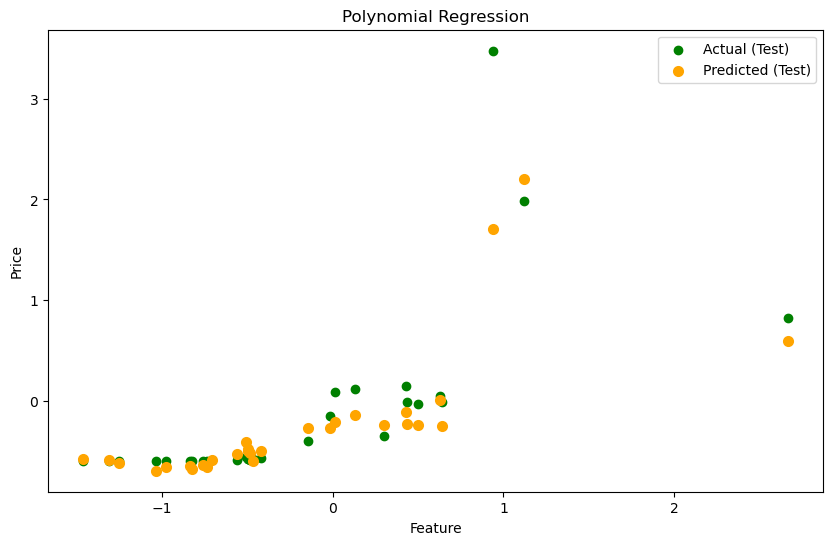

In [32]:
sort_axis = np.argsort(X_test[:, 0])
sorted_x = X_test[:, 0][sort_axis]
sorted_y = y_test[sort_axis]
plt.figure(figsize=(10, 6))

# Predicted values for test data
y_test_pred = poly_model.predict(poly_features.transform(X_test))
plt.scatter(X_test[:, 0], y_test, color='green', label='Actual (Test)')
plt.scatter(X_test[:, 0], y_test_pred, color='orange', linewidth=2, label='Predicted (Test)')

# Evaluation metrics
print("\nPolynomial Regression - Test Set")
print("MSE: ", mse_test)
print("R2 Score: ", r2_test)

plt.xlabel('Feature')
plt.ylabel('Price')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

Bayesian Ridge Regression - Training Set
MSE:  0.07289352700245962
R2 Score:  0.9310982472491719


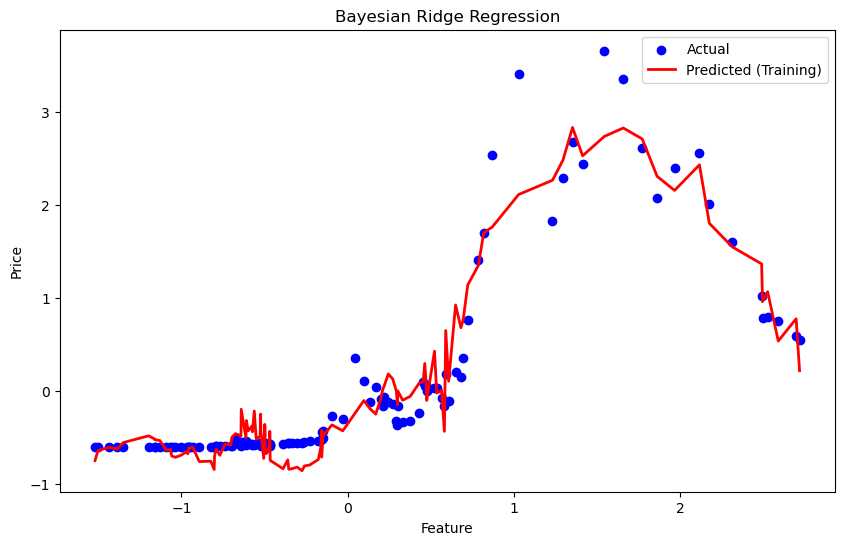

In [33]:
# Bayesian Ridge Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred_bayesian = bayesian_model.predict(X_train)
y_test_pred_bayesian = bayesian_model.predict(X_test)

# Evaluation metrics
mse_train_bayesian = mean_squared_error(y_train, y_train_pred_bayesian)
mse_test_bayesian = mean_squared_error(y_test, y_test_pred_bayesian)
r2_train_bayesian = r2_score(y_train, y_train_pred_bayesian)
r2_test_bayesian = r2_score(y_test, y_test_pred_bayesian)

print("Bayesian Ridge Regression - Training Set")
print("MSE: ", mse_train_bayesian)
print("R2 Score: ", r2_train_bayesian)

# Visualization
plt.figure(figsize=(10, 6))

# Sort the values for better visualization
sort_axis = np.argsort(X_train[:, 0])
sorted_x = X_train[:, 0][sort_axis]
sorted_y = y_train[sort_axis]
plt.scatter(sorted_x, sorted_y, color='blue', label='Actual')

# Predicted values for training data
y_train_pred_bayesian = bayesian_model.predict(X_train)
plt.plot(sorted_x, y_train_pred_bayesian[sort_axis], color='red', linewidth=2, label='Predicted (Training)')

plt.xlabel('Feature')
plt.ylabel('Price')
plt.title('Bayesian Ridge Regression')
plt.legend()
plt.show()



Bayesian Ridge Regression - Test Set
MSE:  0.1194297703673433
R2 Score:  0.8396684051306962


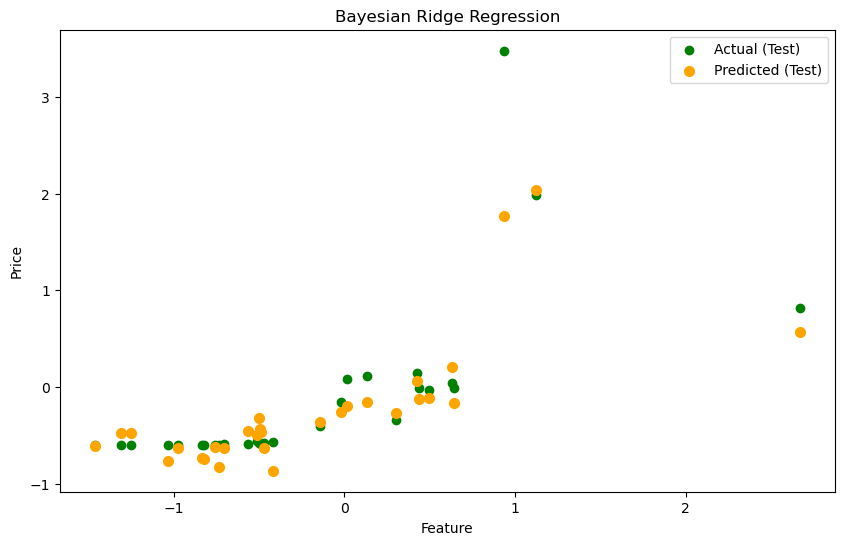

In [34]:
sort_axis = np.argsort(X_test[:, 0])
sorted_x = X_test[:, 0][sort_axis]
sorted_y = y_test[sort_axis]
plt.figure(figsize=(10, 6))

# Predicted values for test data
y_test_pred_bayesian = bayesian_model.predict(X_test)
plt.scatter(X_test[:, 0], y_test, color='green', label='Actual (Test)')
plt.scatter(X_test[:, 0], y_test_pred_bayesian, color='orange', linewidth=2, label='Predicted (Test)')

# Evaluation metrics
print("\nBayesian Ridge Regression - Test Set")
print("MSE: ", mse_test_bayesian)
print("R2 Score: ", r2_test_bayesian)

plt.xlabel('Feature')
plt.ylabel('Price')
plt.title('Bayesian Ridge Regression')
plt.legend()
plt.show()
